# Importing Libraries

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Loading Boston Dataset

In [2]:
boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
X = boston.data
y = boston.target

### Considering only Rooms as X from the Boston Dataset

In [5]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [6]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

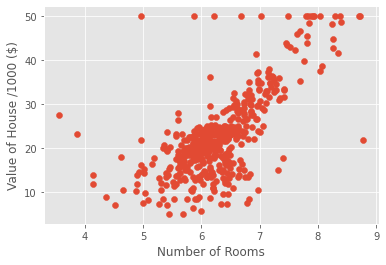

In [7]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of Rooms')
plt.show;

**Fitting the Model by considering X_rooms**

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

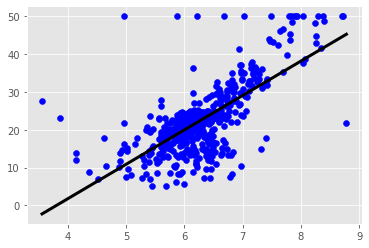

In [9]:
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), color="black", linewidth=3)
plt.show()

# Fitting the model and Evaluating

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Fitting regression line over all variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

print("Accuracy score: ", reg_all.score(X_test, y_test))

Accuracy score:  0.7112260057484974


In [11]:
from sklearn.metrics import mean_squared_error

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7112260057484974
Root Mean Squared Error: 4.638689926172788


# Cross Validation to Evaluate the model more precisely

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=5)

print(cv_results)

print(np.mean(cv_results))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.35327592439588507


# Regularizing Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.6996938275127313

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.595022953532855

# Understanding which Features are important using Lasso

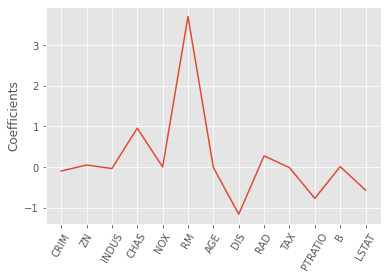

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X, y).coef_

names = boston.feature_names
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel("Coefficients")
plt.show()

As seen, 'RM' variable is the most important variable for predicting the dependent variable. Also 'DIS' is the least significant variable for modelling.

# Getting Summary of Regression model (using statsmodel library)

In [16]:
import statsmodels.api as sm

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = sm.add_constant(X_train)
# we need to add a constant so that statsmodel will calculate the summary with intercept, not needed in normal regression
# using sklearn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
print("First example:",X_train[0])

First example: [1.0000e+00 2.9850e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01
 6.4300e+00 5.8700e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01
 3.9412e+02 5.2100e+00]


In [20]:
# Model fitting
model = sm.OLS(y_train, X_train)
results = model.fit()

In [21]:
# Getting the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.96e-92
Time:                        11:33:54   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

In [22]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.7434997532004697
adjusted coefficient of determination: 0.7336923908228405
regression coefficients: [ 3.16310840e+01 -1.33470103e-01  3.58089136e-02  4.95226452e-02
  3.11983512e+00 -1.54170609e+01  4.05719923e+00 -1.08208352e-02
 -1.38599824e+00  2.42727340e-01 -8.70223437e-03 -9.10685208e-01
  1.17941159e-02 -5.47113313e-01]
